             Rating         votes  approx_cost(for two people)
count  41263.000000  41263.000000                 41263.000000
mean       3.702011    352.683179                   603.914063
std        0.439985    884.177761                   464.942973
min        1.800000      0.000000                    40.000000
25%        3.400000     21.000000                   300.000000
50%        3.700000     73.000000                   500.000000
75%        4.000000    277.000000                   750.000000
max        4.900000  16832.000000                  6000.000000
                                                    online_order  book_table  \
cuisines                                                                       
afghan, arabian                                         1.000000    0.000000   
afghan, biryani, mughlai, north indian                  1.000000    1.000000   
afghan, chinese, fast food, gujarati, north ind...      1.000000    0.000000   
afghan, lebanese, mediterranean  

<Axes: >

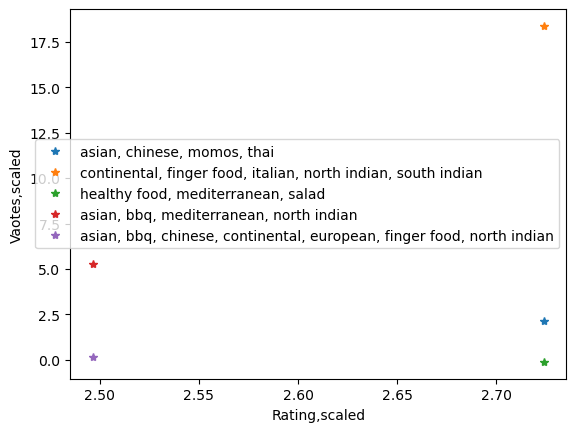

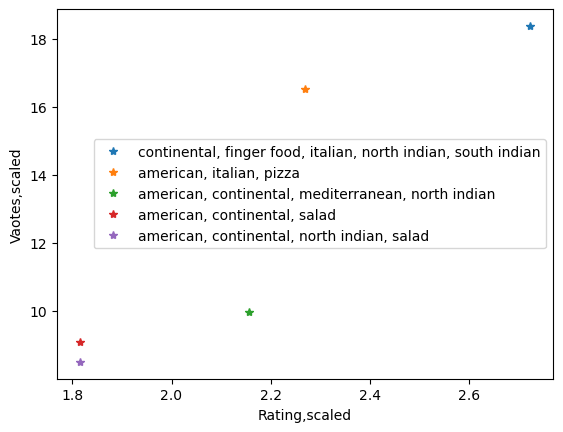

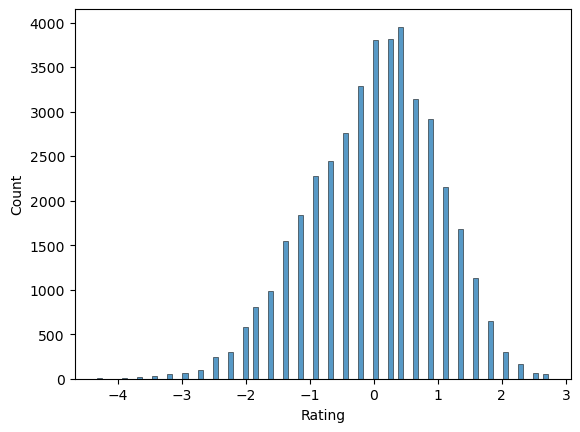

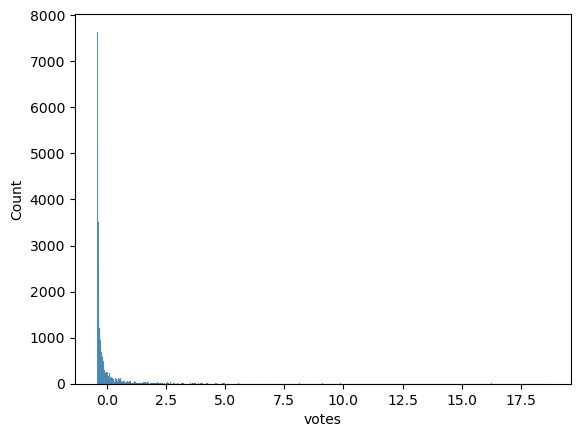

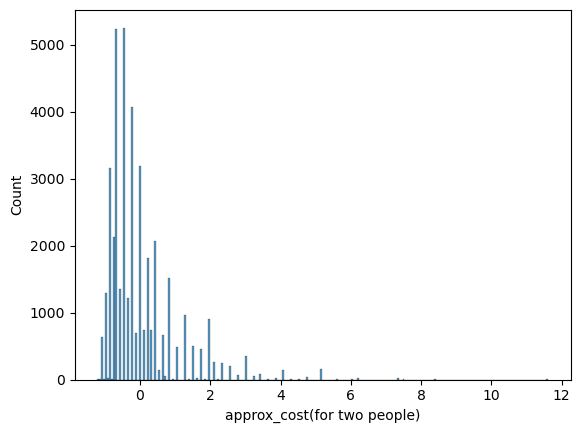

<Figure size 640x480 with 0 Axes>

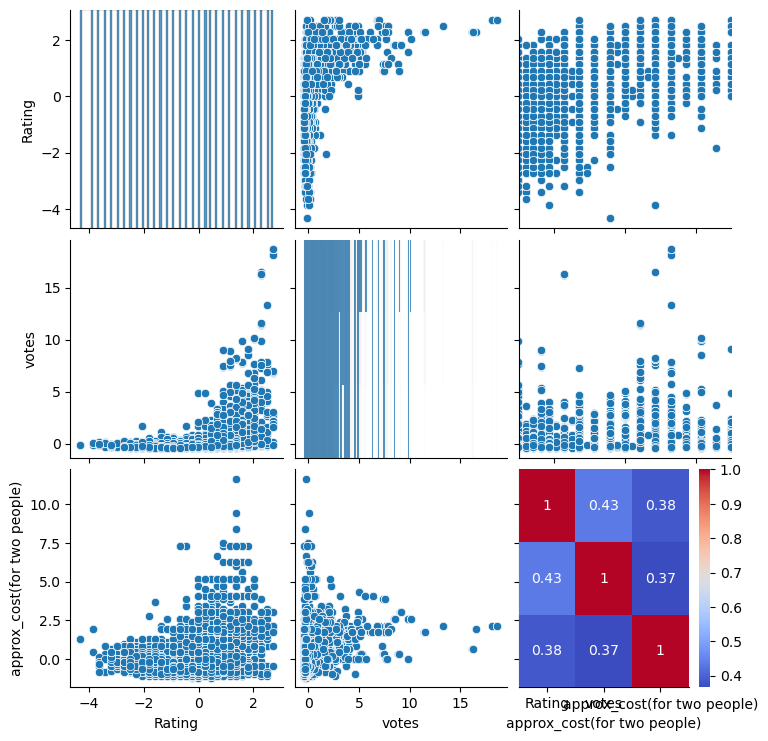

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#Loading Dataset
df=pd.read_csv(r"C:\Adithya\IITK\IITK EDU\Stamatics- Deep Flow\data.xlsx - zomato.csv")
df_c=df.copy()

#Initial Observations
df_c.head()
#df_c.info()
print(df_c.describe())

# df_c.isnull()#To check for null values



#Handling Inconsistencies in text names(if any) for text columns
df_c['name']=df_c['name'].str.strip().str.lower()
df_c['location']=df_c['location'].str.strip().str.lower()
df_c['listed_in(type)']=df_c['listed_in(type)'].str.strip().str.lower()
df_c['listed_in(city)']=df_c['listed_in(city)'].str.strip().str.lower()
df_c['rest_type']=df_c['rest_type'].str.strip().str.lower()
df_c['cuisines']=df_c['cuisines'].str.strip().str.lower()
df_c['book_table']=df_c['book_table'].str.strip().str.lower()

#Checking and handling duplicates
duplicates = df_c[df_c.duplicated()]
df_c=df_c.drop_duplicates()
df_c.head()

#Standardization of Numerical columns(mean centering and variance scaling), helps in proper analysis of covariance and dependent ML models
numeric_cols = df_c.select_dtypes(include='number').columns
scaler = StandardScaler()
df_c[numeric_cols] = scaler.fit_transform(df_c[numeric_cols])

#Conversion of columns to appropriately preferred datatypes
#Yes/no textual data to binary
yes_no_cols = df_c.columns[df_c.apply(lambda col: col.dropna().astype(str).str.lower().isin(['yes', 'no']).all())]

for col in yes_no_cols:
    df_c[col] = df_c[col].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}).astype('int8')

#managing textual columns with fewer unique values as categories instead of objects
for col in df_c.select_dtypes(include='object').columns:
    if df_c[col].nunique() / len(df) < 0.6:  
        df_c[col] = df_c[col].astype('category')
        
# Sorting the cuisine combo list and rest_type to take down duplicates due to lexicographical ordering differences
def clean_sort(cuisine_str):
    cuisines = [c.strip().lower() for c in cuisine_str.split(',')]
    cuisines_sorted = sorted(cuisines)
    return ', '.join(cuisines_sorted)

# Grouping by cuisine combos and calculating average for each combo and printing the top cuisines based on Rating/Votes as well average statistic per cuisine
df_c['cuisines'] = df_c['cuisines'].apply(clean_sort)
df_c['rest_type'] = df_c['rest_type'].apply(clean_sort)
df_c_grouped=df_c.groupby('cuisines').mean(numeric_only=True)
print(df_c_grouped)

df_c_top_cuisines_sorted_by_Ratings = df_c_grouped.sort_values(by='Rating',ascending=False)
df_c_top_cuisines_sorted_by_Popularity = df_c_grouped.sort_values(by='votes',ascending=False)
df_c_top_cuisines_sorted_by_Ratings = df_c_top_cuisines_sorted_by_Ratings.reset_index()
df_c_top_cuisines_sorted_by_Popularity = df_c_top_cuisines_sorted_by_Popularity.reset_index()
print(df_c_top_cuisines_sorted_by_Ratings['cuisines'])
print(df_c_top_cuisines_sorted_by_Popularity['cuisines'])

#Best Rated restaurants and their cuisines
df_c_best_restaurants = df_c.sort_values(by='Rating',ascending = False)
df_c_best_restaurants = df_c_best_restaurants[['name','cuisines']]
df_c_best_restaurants.head()

#Top 5 Best Rated restaurants for each cuisine 
plt.figure()
for i in range(5):
    plt.plot(df_c_top_cuisines_sorted_by_Ratings.iloc[i,3],df_c_top_cuisines_sorted_by_Ratings.iloc[i,4],'*',label=df_c_top_cuisines_sorted_by_Ratings.iloc[i,0])
    plt.xlabel("Rating,scaled")
    plt.ylabel("Vaotes,scaled")
    plt.legend()

#Top 5 Best Voted restaurants for each cuisine 
plt.figure()
for i in range(5):
    plt.plot(df_c_top_cuisines_sorted_by_Popularity.iloc[i,3],df_c_top_cuisines_sorted_by_Popularity.iloc[i,4],'*',label=df_c_top_cuisines_sorted_by_Popularity.iloc[i,0])
    plt.xlabel("Rating,scaled")
    plt.ylabel("Vaotes,scaled")
    plt.legend()

#Some other analysis
for i in numeric_cols:
    plt.figure()
    sns.histplot(df_c[i])


plt.figure()
sns.pairplot(df_c[numeric_cols])

corr = df_c[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')